# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
rolling_dice=random.choices(range(1,7), k = 10)

dice=pd.DataFrame(rolling_dice,columns=['numbers'])
dice

,numbers
0,2
1,2
2,1
3,6
4,6
5,3
6,2
7,3
8,1
9,6


#### 2.- Plot the results sorted by value.

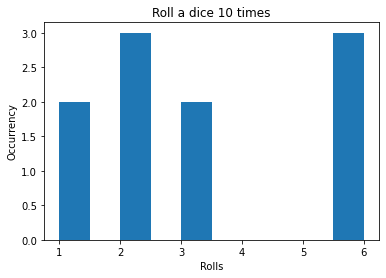

In [4]:
# your code here
dice.sort_values(by='numbers')
#dice['numbers'].values.tolist()
plt.hist(dice)
plt.title('Roll a dice 10 times')
plt.xlabel('Rolls')
plt.ylabel('Occurrency')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(   Event  Frequency
 2      1          2
 0      2          3
 3      3          2
 1      6          3,
 <BarContainer object of 4 artists>)

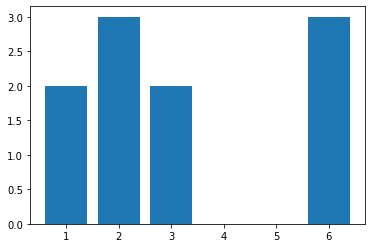

In [7]:
# your code here
fd = dice.value_counts().reset_index() 
fd.columns = ['Event', 'Frequency']
fd = fd.sort_values('Event')
fd, plt.bar(fd['Event'],fd['Frequency'])

In [ ]:
"""
your comments here

As we can see, both plots are the same.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean(row):
    event=0
    sum=0
    
    for item in row:
        sum+=item    
    return sum/len(row)
        
mean(dice['numbers'])

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here

fd = dice.value_counts() 
fd = fd.reset_index()
fd.columns = ['Event', 'Frequency']
fd = fd.sort_values('Event')
fd

,Event,Frequency
2,1,2
0,2,3
3,3,2
1,6,3


In [10]:
def mean_fd(col_event,col_freq):
    total_elements=0
    sum=0
    
    for event,freq in zip(col_event,col_freq):
        sum+=(event*freq)
        total_elements+=freq
        
    return sum/total_elements
        
mean_fd(fd['Event'],fd['Frequency'])

3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here
dice_sort = dice.sort_values(by='numbers')
dice_sort = dice_sort.reset_index()
dice_sort = dice_sort.drop ('index',axis=1)
dice_sort

,numbers
0,1
1,1
2,2
3,2
4,2
5,3
6,3
7,6
8,6
9,6


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [20]:
# your code here
quart_1 = median(dice_sort_list[:5])
quart_2 = median(dice_sort_list)
quart_3 = median(dice_sort_list[5:])
IQR= quart_3 - quart_1
quart_1,quart_2,quart_3,IQR

(2, 2.5, 6, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [28]:
# your code here
dice_100=pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_100=dice_100.sort_values('value')
dice_100.head()

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1


In [ ]:
"""
your comments here

Numbers 4 and 6 are the values with highest frequency
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [32]:
# your code here
mean(dice_100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [33]:
# your code here
fd = dice_100['value'].value_counts() 
fd = fd.reset_index()
fd.columns = ['Event', 'Frequency']
fd = fd.sort_values('Event')
fd

,Event,Frequency
4,1,12
2,2,17
3,3,14
1,4,22
5,5,12
0,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

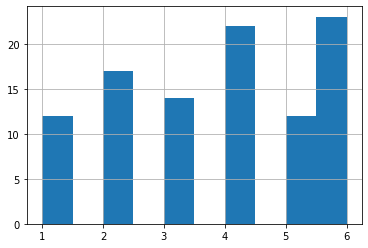

In [37]:
# your code here
dice_100['value'].hist()

In [ ]:
"""
your comments here

The mean is 3.74 and the the numbers with most frequency are 6, 4 and 2 so makes sense this mean.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

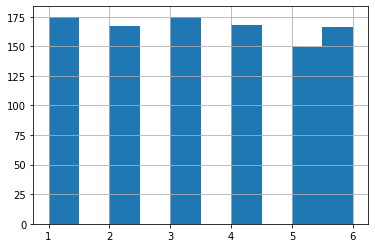

In [38]:
# your code here
dice_1000=pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_1000['value'].hist()

In [ ]:
"""
your comments here

This is the probe that statistics exist xD, if we continue to infinite rolling the dice, we are going to end up with all numbers with the same frequency.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [41]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population['observation'] = ages_population['observation'].astype(int)
ages_population = ages_population.sort_values('observation')
ages_population.head()

,observation
489,1
209,1
301,2
451,2
338,4


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

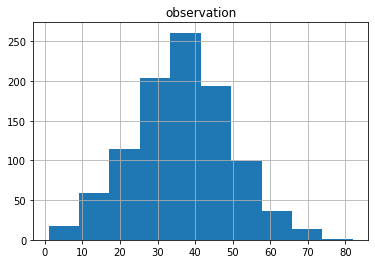

In [42]:
ages_population.hist()

Mean would be between 30-40 and standard deviation around 10-20

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [45]:
# your code here
display(ages_population.mean())
display(ages_population.std())

observation    36.56
dtype: float64

observation    12.8165
dtype: float64

In [ ]:
"""
your comments here
I think so!

"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [48]:
# your code here
ages_population2=pd.read_csv('../data/ages_population2.csv')
ages_population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

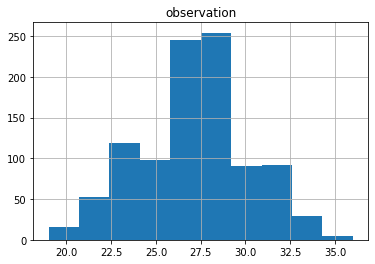

In [49]:
ages_population2.hist()

In [52]:
df1 = ages_population2['observation'].value_counts() 
df1 = df1.reset_index()
df1.columns = ['Event', 'Frequency']
df1 = df1.sort_values('Event')
print (df1)

    Event  Frequency
15   19.0          3
13   20.0         13
12   21.0         17
9    22.0         35
8    23.0         41
6    24.0         78
4    25.0         98
2    26.0        120
1    27.0        125
0    28.0        139
3    29.0        115
5    30.0         90
7    31.0         61
10   32.0         31
11   33.0         22
14   34.0          7
16   35.0          3
17   36.0          2


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

Now the number of people with other age than 26-29 is quite low.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [55]:
# your code here
ages_population2.mean(), np.std(ages_population2)

(observation    27.155
 dtype: float64,
 observation    2.968329
 dtype: float64)

In [ ]:
"""
your comments here

As we can see, the std is only 2.9 that means that almost every event is between 27-2.9 and 27+2.9.

We have an almost perfect normal distribution.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,Event,Frequency
73,1.0,1
68,2.0,2
66,4.0,2
69,5.0,1
74,7.0,1
...,...,...
57,73.0,6
55,74.0,6
63,75.0,2
70,76.0,1


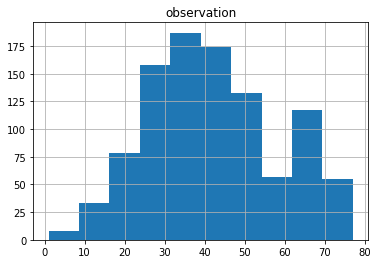

In [56]:
# your code here
ages_population3=pd.read_csv('../data/ages_population3.csv')
ages_population3.head()
ages_population3.hist()
df1 = ages_population3['observation'].value_counts() 
df1 = df1.reset_index()
df1.columns = ['Event', 'Frequency']
df1 = df1.sort_values('Event')
df1

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [57]:
# your code here
ages_population3.mean(), np.std(ages_population3)

(observation    41.989
 dtype: float64,
 observation    16.136632
 dtype: float64)

In [ ]:
"""
your comments here

We can see that with a mean of almost 42 and a std=16.1 we have a positive skewed.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [58]:
# your code here
ages_population3_sort=ages_population3.sort_values(by='observation')
ages_population3_sort=ages_population3_sort.reset_index()
ages_population3_sort = ages_population3_sort.drop ('index',axis=1)
ages_population3_list=list(ages_population3_sort['observation'])
ages_population3_list

[1.0,
 2.0,
 2.0,
 4.0,
 4.0,
 5.0,
 7.0,
 8.0,
 9.0,
 10.0,
 10.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,
 13.0,
 13.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 

In [60]:
quart1 = median(ages_population3_list[:len(ages_population3_list)//2])
quart2 = median(ages_population3_list)
quart3 = median(ages_population3_list[len(ages_population3_list)//2:]) 
IQR = quart3 - quart1
  
quart1,quart2,quart3, IQR

(30.0, 40.0, 53.0, 23.0)

In [ ]:
"""
your comments here
50% of the population is between 30 and 53.
The median is 40.

We have a lot of people between 30 and 40.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

(36.0, 67.0)

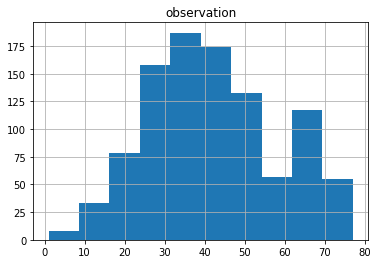

In [62]:
# your code here
ages_population3.hist()
np.percentile(ages_population3_list, 40),np.percentile(ages_population3_list, 90)

In [ ]:
"""
your comments here

The 40% people are 36 or below.
And the 90% of them are 67 or below.

This can tell us that we are seing at a table with young people.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""